# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 2 hours**. For this time interval, using the values of the **4 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train a Boosting model for the task. Choose the model based on the number, and type of features available.**



Features:

* Date: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* WindSpeed: Wind Speed.
* GeneralDiffuseFlows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DiffuseFlows

Target:

SolarPower

## Dataset links:
* [DS1](https://drive.google.com/file/d/1-Pcpb1xWpKc8Cgs-P7xqBFHw2NM0dBsA/view?usp=sharing)
* [DS2](https://drive.google.com/file/d/1-Pul07w6LXpm-uo99qbNc86FHhwl4yQD/view?usp=sharing)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

## Read the datasets

In [4]:
data1=pd.read_csv('power_consumption_g3.csv')
data2=pd.read_csv('power_consumption_g3_feat.csv')

In [5]:
data1.sample(3)

,Date,SolarPower
47861,2017-01-27 07:00:00,22705.82278
46947,2017-10-19 21:00:00,42865.99562
4748,2017-04-30 08:30:00,23523.61679


In [6]:
data2.sample(3)

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
2606,2017-01-19 20:40:00,11.08,56.96,0.085,0.066,0.067
42318,2017-11-28 19:00:00,17.85,61.25,4.921,0.069,0.033
16057,2017-07-02 22:50:00,24.38,82.70,4.925,0.077,0.122


## Merge the datasets (and pre-processing if needed)

In [8]:
data = pd.merge(data1, data2, how='inner', on='Date')

In [9]:
data=data.sort_values(by='Date')

In [10]:
data.isnull().sum()

Date                     0
SolarPower               0
Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
dtype: int64

In [11]:
data.sample(3)

,Date,SolarPower,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
15534,2017-11-02 23:30:00,28923.07692,16.88,79.70,0.079,0.055,0.133
8754,2017-10-05 10:10:00,34194.48578,25.41,60.05,4.918,414.300,150.300
13369,2017-03-18 15:30:00,32905.53191,11.79,88.70,0.080,129.200,118.600


In [12]:
original = data['Date']
dates = []
hours = []
for row in original:
    if not len(row) >0:
        dates.append(np.nan)
        hours.append(np.nan)
    else:
        d = row.split(' ')[0]
        h = row.split(' ')[1]
        dates.append(d)
        hours.append(h)

In [13]:
data.head(5)

,Date,SolarPower,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
32131,2017-01-01 00:00:00,34055.69620,6.559,73.8,0.083,0.051,0.119
46287,2017-01-01 00:10:00,29814.68354,6.414,74.5,0.083,0.070,0.085
16887,2017-01-01 00:20:00,29128.10127,6.313,74.5,0.080,0.062,0.100
16579,2017-01-01 00:30:00,28228.86076,6.121,75.0,0.083,0.091,0.096
22017,2017-01-01 00:40:00,27335.69620,5.921,75.7,0.081,0.048,0.085


In [14]:
data['Date'] = dates
data['Time'] = hours

In [15]:
data.isnull().sum()

Date                     0
SolarPower               0
Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
Time                     0
dtype: int64

In [16]:
columns=['Temperature','Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows']
data[columns] = data[columns].interpolate(limit_direction='both')

In [17]:
data.isnull().sum()

Date                   0
SolarPower             0
Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
Time                   0
dtype: int64

In [18]:
data.head(20)

,Date,SolarPower,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Time
32131,2017-01-01,34055.69620,6.559,73.8,0.083,0.051,0.119,00:00:00
46287,2017-01-01,29814.68354,6.414,74.5,0.083,0.070,0.085,00:10:00
16887,2017-01-01,29128.10127,6.313,74.5,0.080,0.062,0.100,00:20:00
16579,2017-01-01,28228.86076,6.121,75.0,0.083,0.091,0.096,00:30:00
22017,2017-01-01,27335.69620,5.921,75.7,0.081,0.048,0.085,00:40:00
18683,2017-01-01,26624.81013,5.781,76.9,0.081,0.059,0.108,00:50:00
51663,2017-01-01,25998.98734,5.641,77.7,0.080,0.048,0.096,01:00:00
32159,2017-01-01,25446.07595,5.496,77.9,0.085,0.055,0.093,01:10:00
3936,2017-01-01,24777.72152,5.678,78.1,0.081,0.066,0.141,01:20:00
16437,2017-01-01,24279.49367,5.491,77.3,0.082,0.062,0.111,01:30:00


array([[<Axes: title={'center': 'SolarPower'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'WindSpeed'}>],
       [<Axes: title={'center': 'GeneralDiffuseFlows'}>,
        <Axes: title={'center': 'DiffuseFlows'}>]], dtype=object)

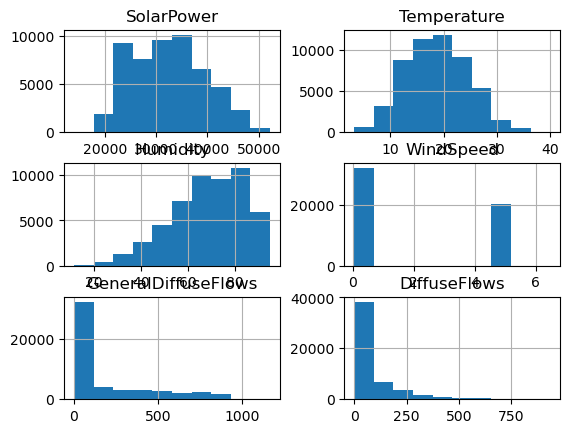

In [19]:
data.hist()

## Group the datasets into time intervals of 2 hours

## Create lags

In [22]:
data=data.drop(columns=['Date','Time'])

# Split the dataset into 80% training and 20% testing datasets

In [24]:
X = data.drop(['SolarPower'],axis=1)
Y = data['SolarPower']

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

## Create the model, pre-process the data and make it suitable for training

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [28]:
from sklearn.model_selection import KFold, RepeatedKFold
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)

50

In [29]:
param_grid={
    
}

In [30]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf)

In [31]:
cv.fit(X,Y)


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=LinearRegression(), param_grid={})

In [32]:
cv.best_score_


0.20705412505918844

In [33]:
model = cv.best_estimator_

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(Y_test,y_pred)


4929.363094741647

In [36]:
r2_score(Y_test,y_pred)


0.09460886349095265

# XGBOOST

In [38]:
X = data.drop(['SolarPower'],axis=1)
Y = data['SolarPower']

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

In [40]:
from xgboost import XGBRegressor

model = XGBRegressor()

In [41]:
from sklearn.model_selection import KFold, RepeatedKFold
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)

50

In [42]:
param_grid ={
    'n_estimators':[5, 3, 2],
    'max_depth': [10,15,20,25],
    'max_leaves': [4,8,12]
}

In [43]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf)

In [44]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)>

In [45]:
cv.fit(X,Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_leaves': [4, 8, 12], 'n_estimators': [5, 3, 2]})

In [49]:
model = cv.best_estimator_

In [51]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(Y_test,y_pred)

4723.324008074387

In [55]:
r2_score(Y_test,y_pred)

0.14178674369411493